In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
from   scipy.optimize import minimize
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [13]:
df_amazon=pd.read_csv('./data_cleaned/tw amazon.csv')
df_walmart=pd.read_csv('./data_cleaned/tw walmart.csv')
df_target=pd.read_csv('./data_cleaned/tw target.csv')
df_eBay=pd.read_csv('./data_cleaned/tw eBay.csv')
df_Bestbuy=pd.read_csv('./data_cleaned/tw Bestbuy.csv')

Combining the datasets from the row.

In [27]:
df_concat=pd.concat([df_target, df_amazon,df_Bestbuy,df_eBay,df_walmart])
df_concat=df_concat.reset_index(drop=True)
df_use=df_concat.loc[df_concat['source'].isin(['Twitter for iPhone','Twitter for Android','Twitter Web App','Media uploads app','The Bargain Hunter','WordPress.com'])]
df_use.head()

,public_metrics,edit_history_tweet_ids,id,created_at,source,author_id,lang,text,cleaned_text,Tweet_tokenized
0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1578819408352665601'],1578819408352665601,2022-10-08T18:47:34.000Z,Twitter for iPhone,1108818128836927488,en,I’m tired\nPissed off\nI’m old\nI work with fu...,tiredPissed offIm oldI work with fucking idiot...,"['tiredpissed', 'offim', 'oldi', 'work', 'with..."
1,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",['1578819405168857088'],1578819405168857088,2022-10-08T18:47:33.000Z,Twitter for iPhone,4835001889,en,RT @hswapnil: Age alone should not be a criter...,hswapnil alone should criterion kidney transpl...,"['hswapnil', 'alone', 'should', 'criterion', '..."
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1578819402732306432'],1578819402732306432,2022-10-08T18:47:33.000Z,Twitter for iPhone,1377094240824594435,en,Target got this Early Black Friday Sale 🥴,Target this Early Black Friday Sale,"['target', 'this', 'early', 'black', 'friday',..."
3,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1578819402648424449'],1578819402648424449,2022-10-08T18:47:33.000Z,Twitter Web App,1557261092556271616,en,$qnt Top analyst price target for next week;:~...,analyst price target next weekhttpstcozbC9XFp5Ge,"['analyst', 'price', 'target', 'next', 'weekht..."
4,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",['1578819401281077248'],1578819401281077248,2022-10-08T18:47:32.000Z,Twitter for iPhone,898589809370816514,en,NO I MEANT TO GO TO TARGET AFTWR WORK,MEANT TARGET AFTWR WORK,"['meant', 'target', 'aftwr', 'work']"


Eliminate the useless columns

In [29]:
df_use_copy=df_use.drop(['public_metrics','edit_history_tweet_ids','id','created_at','author_id','text','cleaned_text'],axis=1)
df_use_copy

,source,lang,Tweet_tokenized
0,Twitter for iPhone,en,"['tiredpissed', 'offim', 'oldi', 'work', 'with..."
1,Twitter for iPhone,en,"['hswapnil', 'alone', 'should', 'criterion', '..."
2,Twitter for iPhone,en,"['target', 'this', 'early', 'black', 'friday',..."
3,Twitter Web App,en,"['analyst', 'price', 'target', 'next', 'weekht..."
4,Twitter for iPhone,en,"['meant', 'target', 'aftwr', 'work']"
...,...,...,...
486,Twitter for iPhone,en,"['mikesgi62717027', '6imothy', 'tompelissero',..."
487,Twitter for Android,en,"['tacoexistential', 'sound', 'made', 'walmart'..."
488,Twitter for iPhone,fr,"['walmart', 'walmartworld', 'walmartinc', 'wal..."
489,Twitter for iPhone,en,"['sourcigarettez', 'dont', 'know', 'each', 'ot..."


In [30]:
tweet=[]
for i in df_use_copy['Tweet_tokenized']:
  n=i.replace("[","").replace("]","").replace("'","").replace(",","")
  tweet.append(n)

df_use_copy['Tweet_tokenized']=tweet
df_use_copy.head()

,source,lang,Tweet_tokenized
0,Twitter for iPhone,en,tiredpissed offim oldi work with fucking idiot...
1,Twitter for iPhone,en,hswapnil alone should criterion kidney transpl...
2,Twitter for iPhone,en,target this early black friday sale
3,Twitter Web App,en,analyst price target next weekhttpstcozbc9xfp5ge
4,Twitter for iPhone,en,meant target aftwr work


In [31]:
df_use_copy['source'].unique()

array(['Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'WordPress.com', 'The Bargain Hunter', 'Media uploads app'],
      dtype=object)

Using Label Encoder to convert categorical labels to numerical values

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_use_copy['source_cat'] = labelencoder.fit_transform(df_use_copy['source'])
df_use_copy

,source,lang,Tweet_tokenized,source_cat
0,Twitter for iPhone,en,tiredpissed offim oldi work with fucking idiot...,4
1,Twitter for iPhone,en,hswapnil alone should criterion kidney transpl...,4
2,Twitter for iPhone,en,target this early black friday sale,4
3,Twitter Web App,en,analyst price target next weekhttpstcozbc9xfp5ge,2
4,Twitter for iPhone,en,meant target aftwr work,4
...,...,...,...,...
486,Twitter for iPhone,en,mikesgi62717027 6imothy tompelissero they thou...,4
487,Twitter for Android,en,tacoexistential sound made walmart httpstcoiye...,3
488,Twitter for iPhone,fr,walmart walmartworld walmartinc walmarttech wa...,4
489,Twitter for iPhone,en,sourcigarettez dont know each other please kno...,4


In [34]:
labelencoder.classes_

array(['Media uploads app', 'The Bargain Hunter', 'Twitter Web App',
       'Twitter for Android', 'Twitter for iPhone', 'WordPress.com'],
      dtype=object)

Split Dataset into Train and Test sets

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_use_copy['Tweet_tokenized'], 
    df_use_copy['source_cat'], 
    random_state = 1,test_size=0.1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  364
Test dataset:  41


Using Count Vectorizer to convert text data into numeric data

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

Multinomial Naive Bayes classifier Implementation

In [37]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)
predictions

array([4, 4, 4, 4, 4, 4, 5, 3, 4, 0, 5, 4, 1, 3, 4, 1, 4, 4, 4, 4, 4, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, 4])

Accuracy metrics for Naive Bayes

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.5853658536585366
Recall score:  0.5853658536585366
Precision score:  0.4759001161440186
F1 score:  0.5153087701089777


c:\Users\84160\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix to check accuracy of training vs predicted labels

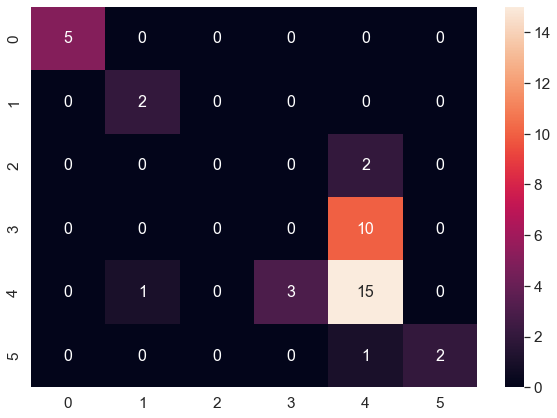

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(6), range(6))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [88]:
# use to check the corresponding source for each number of cat
df_use_copy[df_use_copy['source_cat']==5].head()

,source,lang,Tweet_tokenized,source_cat
123,WordPress.com,ja,amazon 720ml 5500 httpstco4zpdonugrj,5
201,WordPress.com,en,does bestbuy sell apple computercharger httpst...,5
293,WordPress.com,en,early 20th silver plate piece regis plate birm...,5
294,WordPress.com,en,weemsampplath parallel ruler with protractor s...,5
295,WordPress.com,en,antique 19th folk miniature pillow primitive a...,5


Normalizing the confusion matrix value

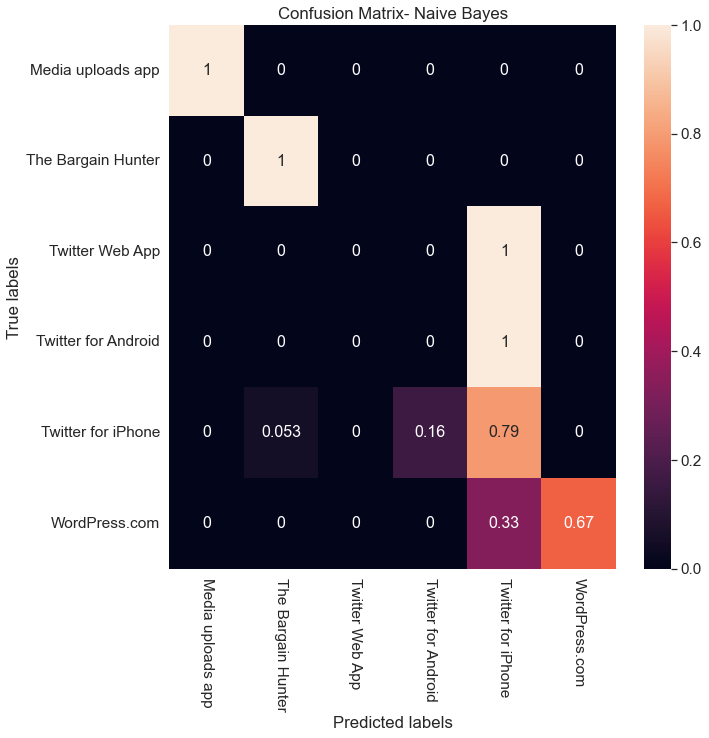

In [62]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
ax= plt.subplot()
sn.set(font_scale=1.4) # for label size
sn.heatmap(cmn, annot=True, annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes')
ax.xaxis.set_ticklabels(['Media uploads app', 'The Bargain Hunter','Twitter Web App','Twitter for Android','Twitter for iPhone','WordPress.com'],rotation=270)
ax.yaxis.set_ticklabels(['Media uploads app', 'The Bargain Hunter','Twitter Web App','Twitter for Android','Twitter for iPhone','WordPress.com'],rotation=0)
plt.show()

Checking and Conclusion 

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer(stop_words = 'english')
training_data1 = tf_vector.fit_transform(X_train)
testing_data1 = tf_vector.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

naive_bayes1 = MultinomialNB()
naive_bayes1.fit(training_data1, y_train)

predictions1 = naive_bayes.predict(testing_data1)
predictions1

array([4, 4, 4, 4, 4, 4, 2, 3, 4, 0, 5, 4, 1, 3, 4, 1, 4, 4, 4, 4, 4, 4,
       3, 0, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, 4])

In [64]:
print("Accuracy score: ", accuracy_score(y_test, predictions1))
print("Recall score: ", recall_score(y_test, predictions1, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions1, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions1, average = 'weighted'))

Accuracy score:  0.5365853658536586
Recall score:  0.5365853658536586
Precision score:  0.4679313459801264
F1 score:  0.4796394485683987


In [ ]:
# The from the test result, we found that the F1 score is quite low.

Since the F1 score of test set is quite low, I try to use another factors and ways to test the data

In [ ]:
########### Second one ###############

Combining dataset using columns

In [ ]:
# create new column platform to remember which platform it is 
df_amazon['platform']=['amazon']*(len(df_amazon))
df_walmart['platform']=['walmart']*(len(df_walmart))
df_target['platform']=['target']*(len(df_target))
df_eBay['platform']=['eBay']*(len(df_eBay))
df_Bestbuy['platform']=['Bestbuy']*(len(df_Bestbuy))

In [73]:
df_all=df_walmart.merge(df_amazon,how='outer').merge(df_target,how='outer').merge(df_eBay,how='outer').merge(df_Bestbuy,how='outer')
df_all.head()

,source,lang,edit_history_tweet_ids,created_at,text,id,author_id,public_metrics,cleaned_text,Tweet_tokenized,platform
0,Twitter for Android,en,['1578844547748020224'],2022-10-08T20:27:28.000Z,RT @TalbertSwan: The Black delegation will tra...,1578844547748020224,46243705,"{'retweet_count': 3597, 'reply_count': 0, 'lik...",TalbertSwan Black delegation will trade Kanye ...,"['talbertswan', 'black', 'delegation', 'will',...",walmart
1,Twitter for Android,en,['1578844547236646913'],2022-10-08T20:27:28.000Z,I wanna be old and grey and still get random k...,1578844547236646913,1311130506243854338,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",wanna grey still random kisses line Walmart,"['wanna', 'grey', 'still', 'random', 'kisses',...",walmart
2,Twitter for iPhone,en,['1578844542983249923'],2022-10-08T20:27:27.000Z,"Don’t ask me why, but Walmart = wear a mask. I...",1578844542983249923,906190737829576704,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Dont Walmart wear mask rules,"['dont', 'walmart', 'wear', 'mask', 'rules']",walmart
3,Twitter for iPhone,en,['1578844536847335425'],2022-10-08T20:27:25.000Z,@NedJeffers You’re most welcome. \n\nBtw if yo...,1578844536847335425,1416609128,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NedJeffers Youre most welcome have trouble hol...,"['nedjeffers', 'youre', 'most', 'welcome', 'ha...",walmart
4,Twitter Web App,en,['1578844499869982720'],2022-10-08T20:27:16.000Z,RT @OfficerPorkChop: @LauraLynn209 Meanwhile h...,1578844499869982720,1449191119867326464,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",OfficerPorkChop LauraLynn209 Meanwhile walking...,"['officerporkchop', 'lauralynn209', 'meanwhile...",walmart


In [75]:
df_all_copy=df_all.drop(['public_metrics','edit_history_tweet_ids','id','created_at','author_id','text','cleaned_text','source'],axis=1)
df_all_copy.head()

,lang,Tweet_tokenized,platform
0,en,"['talbertswan', 'black', 'delegation', 'will',...",walmart
1,en,"['wanna', 'grey', 'still', 'random', 'kisses',...",walmart
2,en,"['dont', 'walmart', 'wear', 'mask', 'rules']",walmart
3,en,"['nedjeffers', 'youre', 'most', 'welcome', 'ha...",walmart
4,en,"['officerporkchop', 'lauralynn209', 'meanwhile...",walmart


In [76]:
tweet=[]
for i in df_all_copy['Tweet_tokenized']:
  n=i.replace("[","").replace("]","").replace("'","").replace(",","")
  tweet.append(n)

df_all_copy['Tweet_tokenized']=tweet
df_all_copy.head()

,lang,Tweet_tokenized,platform
0,en,talbertswan black delegation will trade kanye ...,walmart
1,en,wanna grey still random kisses line walmart,walmart
2,en,dont walmart wear mask rules,walmart
3,en,nedjeffers youre most welcome have trouble hol...,walmart
4,en,officerporkchop lauralynn209 meanwhile walking...,walmart


In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_all_copy['platform_cat'] = labelencoder.fit_transform(df_all_copy['platform'])
df_all_copy.head()

,lang,Tweet_tokenized,platform,platform_cat
0,en,talbertswan black delegation will trade kanye ...,walmart,4
1,en,wanna grey still random kisses line walmart,walmart,4
2,en,dont walmart wear mask rules,walmart,4
3,en,nedjeffers youre most welcome have trouble hol...,walmart,4
4,en,officerporkchop lauralynn209 meanwhile walking...,walmart,4


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_all_copy['Tweet_tokenized'], 
    df_all_copy['platform_cat'], 
    random_state = 1,test_size=0.1
)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  441
Test dataset:  50


In [80]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)
predictions

array([2, 1, 0, 1, 1, 1, 0, 0, 4, 2, 4, 4, 3, 3, 0, 2, 0, 2, 1, 3, 0, 4,
       2, 3, 0, 1, 2, 0, 0, 2, 1, 1, 0, 4, 2, 0, 4, 4, 0, 3, 0, 4, 2, 4,
       2, 1, 4, 2, 2, 2])

In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))

Accuracy score:  0.78
Recall score:  0.78
Precision score:  0.8404102564102565
F1 score:  0.790401902191376


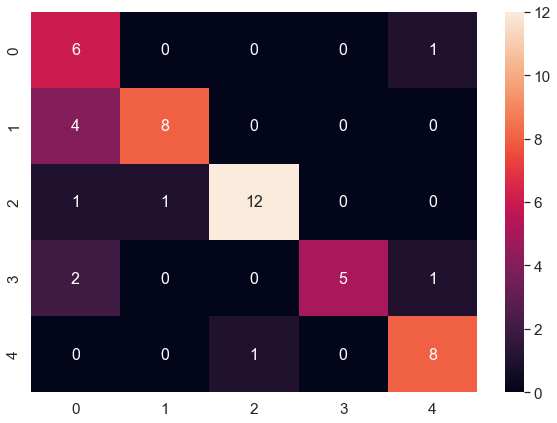

In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [89]:
# use to check the corresponding platform for each catalogue
df_all_copy[df_all_copy['platform_cat']==4].head()

,lang,Tweet_tokenized,platform,platform_cat
0,en,talbertswan black delegation will trade kanye ...,walmart,4
1,en,wanna grey still random kisses line walmart,walmart,4
2,en,dont walmart wear mask rules,walmart,4
3,en,nedjeffers youre most welcome have trouble hol...,walmart,4
4,en,officerporkchop lauralynn209 meanwhile walking...,walmart,4


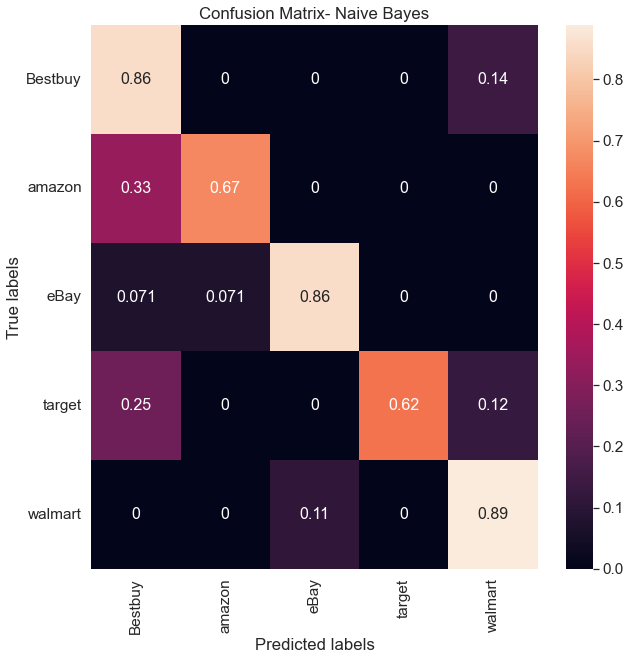

In [91]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
ax= plt.subplot()
sn.set(font_scale=1.4) # for label size
sn.heatmap(cmn, annot=True, annot_kws={"size": 16}) # font size
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes')
ax.xaxis.set_ticklabels(['Bestbuy', 'amazon','eBay','target','walmart'],rotation=90)
ax.yaxis.set_ticklabels(['Bestbuy', 'amazon','eBay','target','walmart'],rotation=0)
plt.show()

Final checking and Conclusion

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer(stop_words = 'english')
training_data1 = tf_vector.fit_transform(X_train)
testing_data1 = tf_vector.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

naive_bayes1 = MultinomialNB()
naive_bayes1.fit(training_data1, y_train)

predictions1 = naive_bayes.predict(testing_data1)
predictions1

array([2, 1, 0, 1, 1, 1, 0, 0, 4, 2, 4, 4, 3, 3, 0, 2, 0, 2, 1, 3, 0, 4,
       2, 3, 0, 1, 2, 0, 0, 2, 1, 1, 0, 4, 2, 0, 4, 4, 0, 3, 0, 4, 2, 4,
       2, 1, 4, 2, 2, 2])

In [93]:
print("Accuracy score: ", accuracy_score(y_test, predictions1))
print("Recall score: ", recall_score(y_test, predictions1, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions1, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions1, average = 'weighted'))

Accuracy score:  0.78
Recall score:  0.78
Precision score:  0.8404102564102565
F1 score:  0.790401902191376


The F-score of the test set is high(0.79), so this test is suitable.

From the confusion matrix, we found that walmart is predicted with 89% which is the highest.

The accuracy of testing can increased by adding more data points in training sets.